In [181]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
dataset = pd.read_csv("/content/drive/MyDrive/churn_dataset.csv")

In [184]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [185]:
# check information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [186]:
dataset.shape

(7043, 21)

In [187]:
# check missing data
dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [188]:
#Droping unwanted feature
dataset.drop(columns=['customerID'],inplace=True)

In [189]:
# check duplicate customer
dataset.duplicated().sum()

22

In [190]:
dataset.drop_duplicates(inplace=True)

In [191]:
dataset.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [192]:
categorical_features = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaperlessBilling','PaymentMethod']
for i in categorical_features:
  print(dataset[i].value_counts())
  print("********************")

gender
Male      3541
Female    3480
Name: count, dtype: int64
********************
SeniorCitizen
0    5880
1    1141
Name: count, dtype: int64
********************
Partner
No     3619
Yes    3402
Name: count, dtype: int64
********************
Dependents
No     4911
Yes    2110
Name: count, dtype: int64
********************
PhoneService
Yes    6339
No      682
Name: count, dtype: int64
********************
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64
********************
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64
********************
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64
********************
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: count, dtype: int64
********************
DeviceProtection
No                     3

#### Replacing 'No internet service' and 'No phone service' with 'No'

In [193]:
dataset.replace(['No internet service','No phone service'], 'No', inplace=True)

In [194]:
categorical_features = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaperlessBilling','PaymentMethod']
for i in categorical_features:
  print(dataset[i].value_counts())
  print("********************")

gender
Male      3541
Female    3480
Name: count, dtype: int64
********************
SeniorCitizen
0    5880
1    1141
Name: count, dtype: int64
********************
Partner
No     3619
Yes    3402
Name: count, dtype: int64
********************
Dependents
No     4911
Yes    2110
Name: count, dtype: int64
********************
PhoneService
Yes    6339
No      682
Name: count, dtype: int64
********************
MultipleLines
No     4050
Yes    2971
Name: count, dtype: int64
********************
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64
********************
OnlineSecurity
No     5002
Yes    2019
Name: count, dtype: int64
********************
OnlineBackup
No     4592
Yes    2429
Name: count, dtype: int64
********************
DeviceProtection
No     4599
Yes    2422
Name: count, dtype: int64
********************
TechSupport
No     4977
Yes    2044
Name: count, dtype: int64
********************
StreamingTV
No     4314
Yes    2707
Name:

# EDA

Text(0.5, 1.0, 'Gender vs Churn')

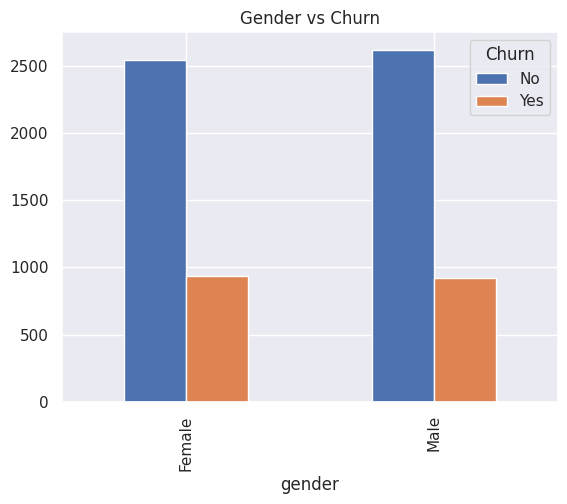

In [195]:
# Relation between Gender vs Churn
gender_wise = pd.crosstab(dataset['gender'], dataset['Churn'])
gender_wise.plot(kind='bar')
plt.title("Gender vs Churn")

In [196]:
#!pip install pandas-profiling

In [197]:
#!pip install ydata-profiling

In [198]:
import ydata_profiling as yp
from ydata_profiling import ProfileReport
profile = ProfileReport(dataset)
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Handling missing value

In [199]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [200]:
dataset[dataset['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [201]:
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(dataset['TotalCharges'].median())

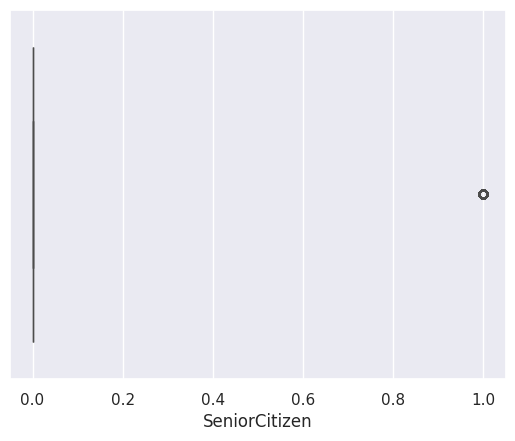

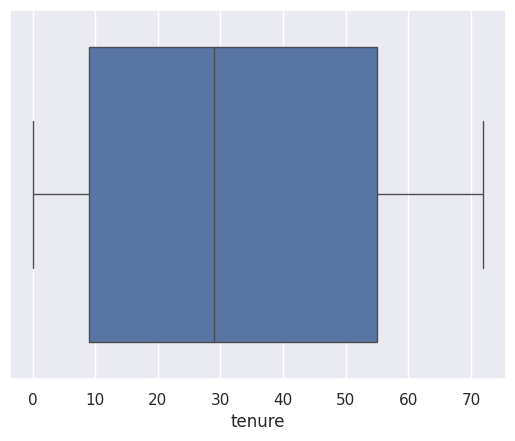

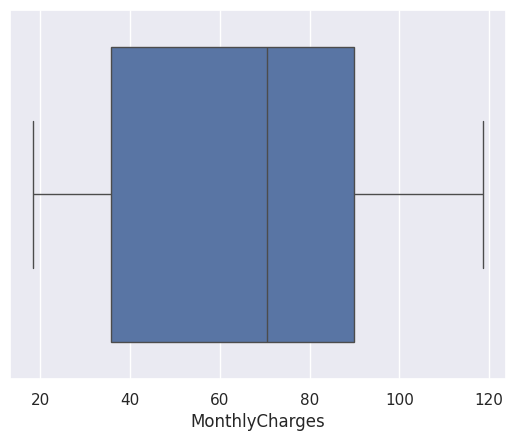

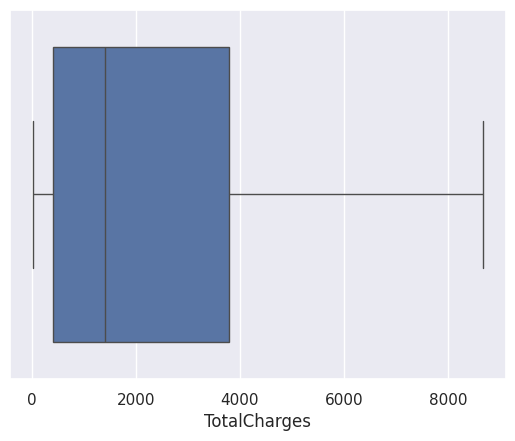

In [202]:
for i in dataset.select_dtypes(include="number").columns:
    sns.boxplot(data=dataset, x=i)
    plt.show()

# Handling Char/Object value

In [203]:
#Encoding categorical features

categorical_features = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling','PaymentMethod']
for i in categorical_features:
  dataset = pd.get_dummies(dataset, columns=[i],drop_first=True,dtype='int64')


In [204]:
dataset.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,No,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,Yes,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1


In [205]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7021 non-null   int64  
 1   tenure                                 7021 non-null   int64  
 2   MonthlyCharges                         7021 non-null   float64
 3   TotalCharges                           7021 non-null   float64
 4   Churn                                  7021 non-null   object 
 5   gender_Male                            7021 non-null   int64  
 6   Partner_Yes                            7021 non-null   int64  
 7   Dependents_Yes                         7021 non-null   int64  
 8   PhoneService_Yes                       7021 non-null   int64  
 9   MultipleLines_Yes                      7021 non-null   int64  
 10  InternetService_Fiber optic            7021 non-null   int64  
 11  InternetS

In [206]:
# mapping
dataset['Churn'] = np.where(dataset['Churn'] == 'Yes', 1, 0)  # yes=1, No=0

In [207]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2288.964517,0.264492,0.504344,0.484546,0.300527,0.902863,0.423159,0.440108,0.215354,0.287566,0.345962,0.344965,0.291127,0.385558,0.389118,0.209799,0.241419,0.592651,0.216778,0.335992,0.227318
std,0.368947,24.534965,30.069001,2265.315517,0.441094,0.500017,0.499797,0.458520,0.296166,0.494095,0.496435,0.411097,0.452660,0.475715,0.475391,0.454314,0.486761,0.487585,0.407194,0.427974,0.491376,0.412080,0.472370,0.419130
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.750000,411.150000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.400000,1403.875000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.900000,3801.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [208]:
condition = [((dataset.tenure >= 0)&(dataset.tenure <= 12)), ((dataset.tenure > 12)&(dataset.tenure <= 24)),
             ((dataset.tenure > 24)&(dataset.tenure <= 36)),((dataset.tenure > 36)&(dataset.tenure <= 48)),
             ((dataset.tenure > 48)&(dataset.tenure <= 60)), (dataset.tenure > 60)]

#choice = ['0-1year','1-2years', '2-3years', '3-4years','4-5years','more than 5 years']
choice = [0,1, 2, 3, 4, 5]
dataset['tenure_range'] = np.select(condition, choice)

In [209]:
dataset.drop(columns=['tenure'],inplace=True)

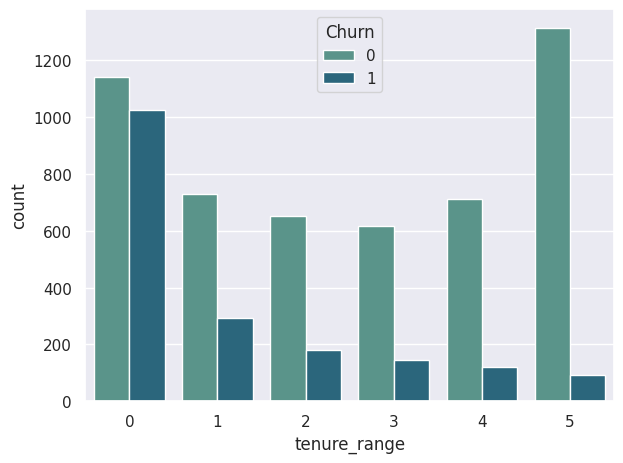

In [210]:
sns.countplot(x= 'tenure_range', hue='Churn', data=dataset, palette='crest', order=choice)
plt.tight_layout()

#### We can notice that customers who stay longer are more loyal to the company and very small number who leave after staying more than 4 years. On the other hand, customers churn rate is very high during the first year.

## Stastical Test

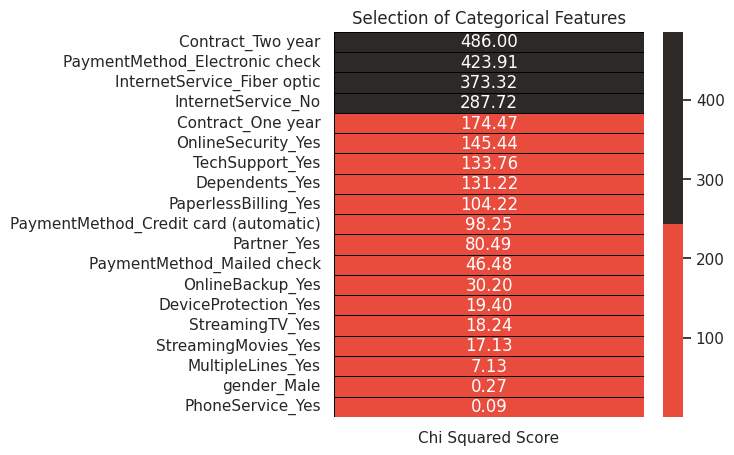

In [211]:
# Chi-Square Test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

categorical_features = ['gender_Male','Partner_Yes','Dependents_Yes','PhoneService_Yes','MultipleLines_Yes','InternetService_Fiber optic',
             'InternetService_No','OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
            'StreamingTV_Yes','StreamingMovies_Yes','Contract_One year','Contract_Two year', 'PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)'
            ,'PaymentMethod_Electronic check','PaymentMethod_Mailed check']
colors = ['#E94B3C', '#2D2926']
features = dataset.loc[:,categorical_features]
target = dataset['Churn']
best_features = SelectKBest(score_func = chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(categorical_features),
                             columns = ['Chi Squared Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'Chi Squared Score'),
            annot=True, cmap = colors, linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Categorical Features')
plt.show()

Contract_Two year,PaymentMethod_Electronic, InternetService_Fiber optic check and InternetService_No feature gives more wieghtage to target feature

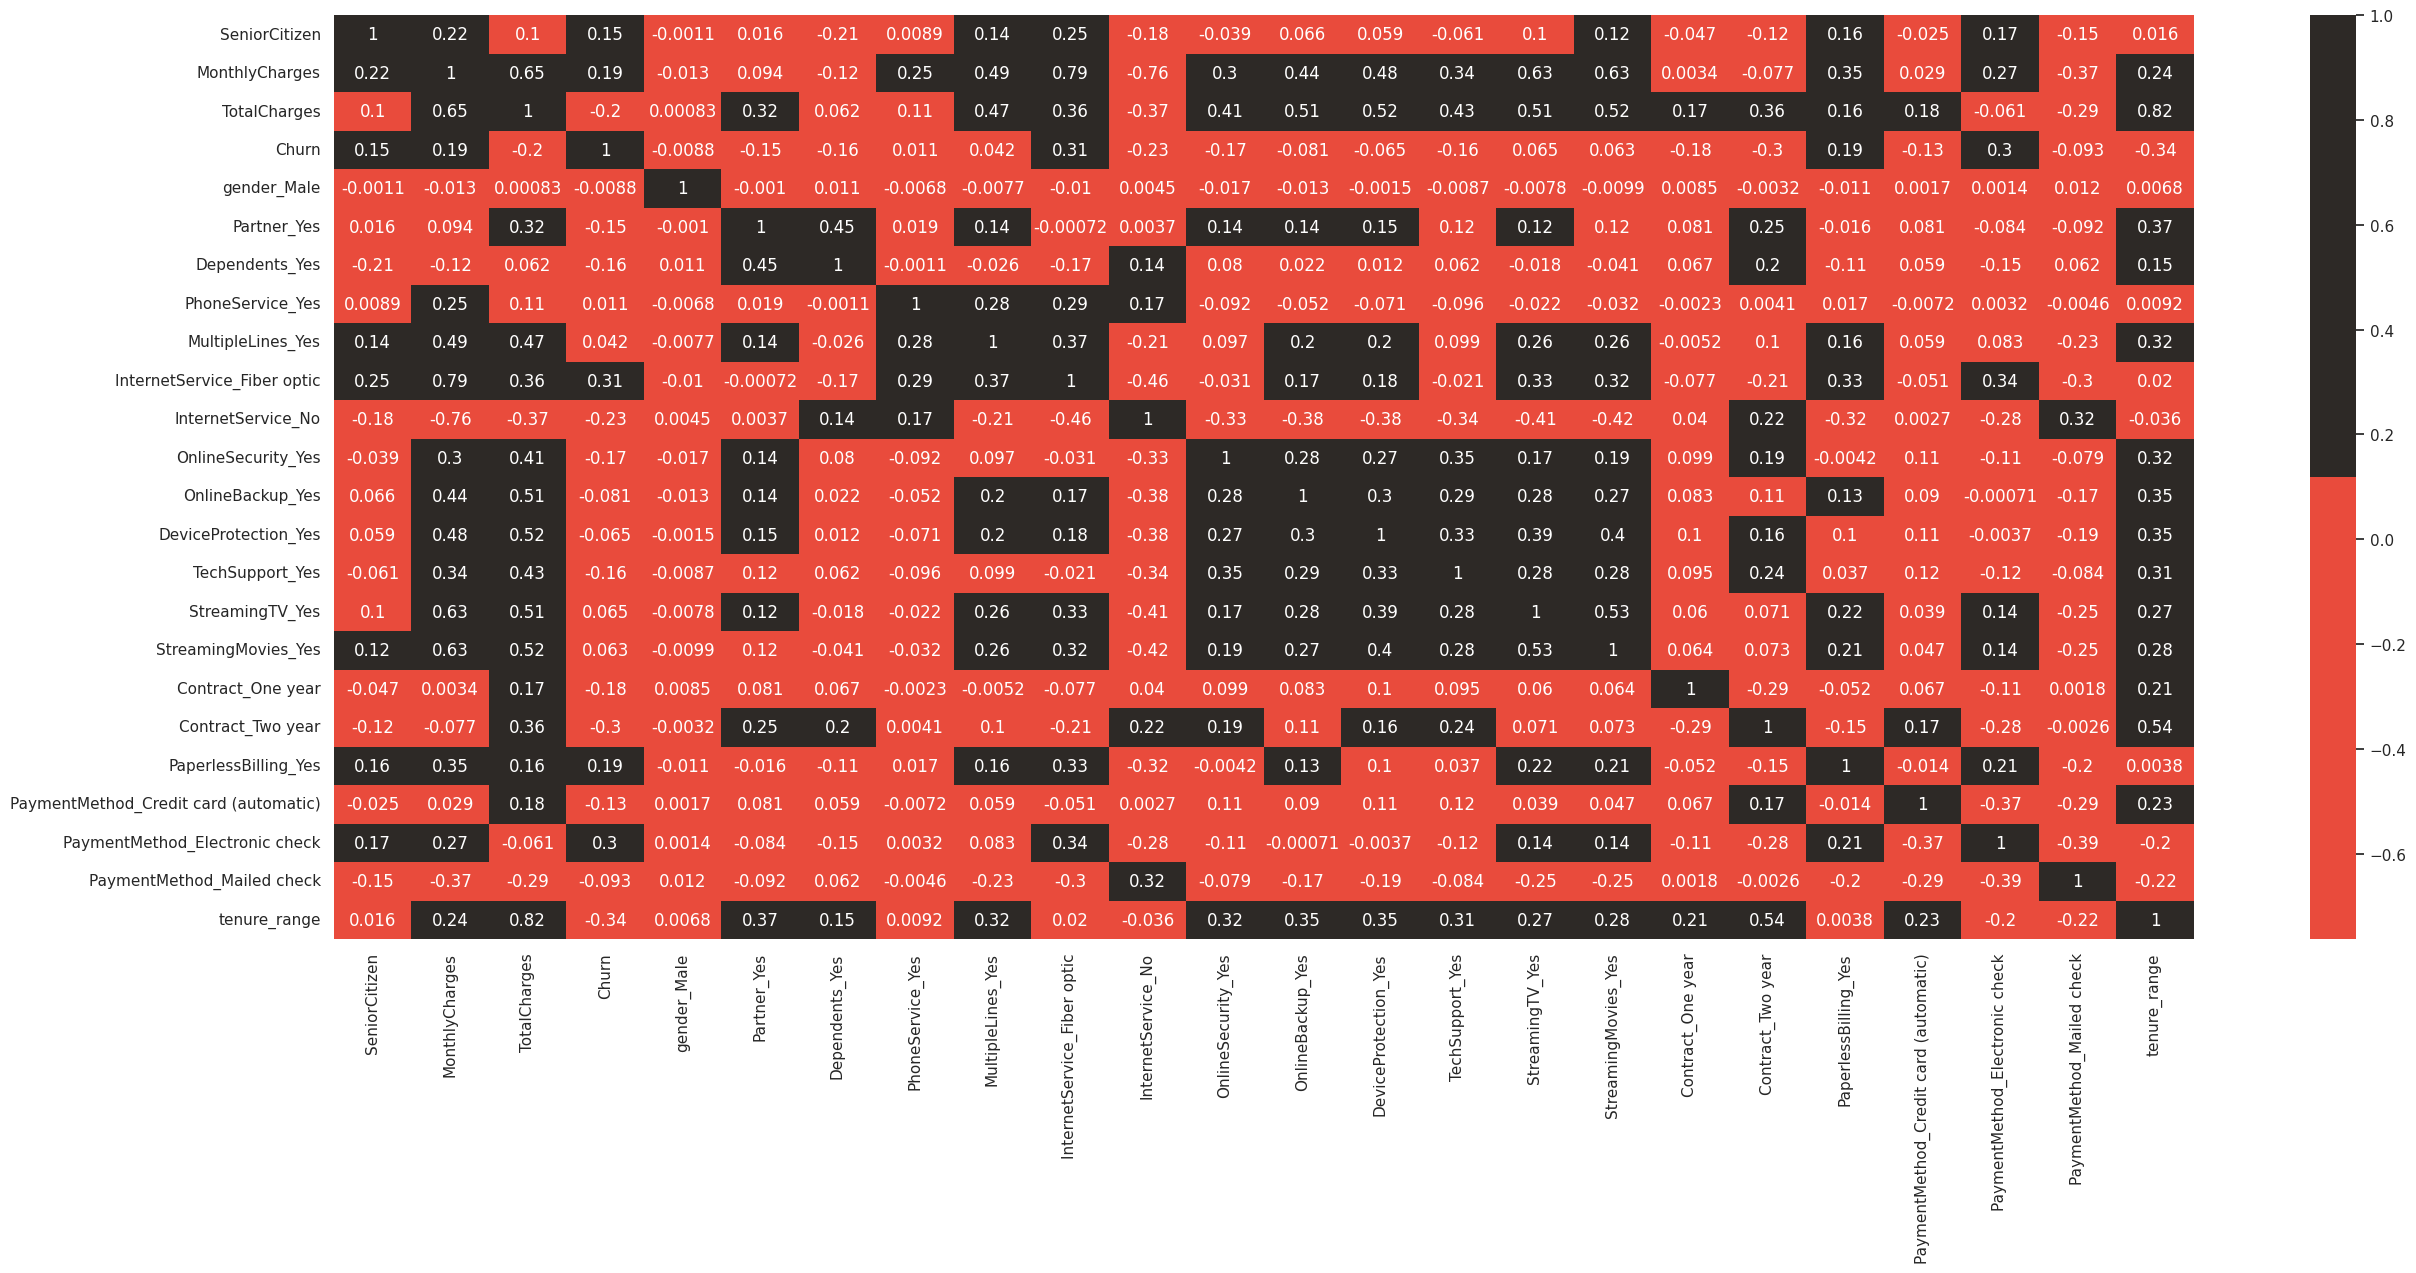

In [212]:
plt.figure(figsize=(30,12))
sns.heatmap(dataset.corr(), cmap=colors, annot=True);

In [213]:
# splitting the data into independent and dependent variable
x = dataset.drop(['Churn'], axis=1)
y = dataset['Churn']

In [214]:
# Feature Importance from RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x, y)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature Importance from Random Forest")
for i in range(x.shape[1]):
    print(f"{x.columns[indices[i]]}: {importances[indices[i]]:.4f}")


Feature Importance from Random Forest
TotalCharges: 0.2874
MonthlyCharges: 0.2085
InternetService_Fiber optic: 0.0991
tenure_range: 0.0890
PaymentMethod_Electronic check: 0.0267
gender_Male: 0.0261
PaperlessBilling_Yes: 0.0232
Partner_Yes: 0.0214
SeniorCitizen: 0.0201
OnlineBackup_Yes: 0.0182
Dependents_Yes: 0.0180
OnlineSecurity_Yes: 0.0175
TechSupport_Yes: 0.0168
Contract_Two year: 0.0167
MultipleLines_Yes: 0.0162
Contract_One year: 0.0159
DeviceProtection_Yes: 0.0150
PaymentMethod_Mailed check: 0.0127
PaymentMethod_Credit card (automatic): 0.0125
StreamingMovies_Yes: 0.0121
StreamingTV_Yes: 0.0115
InternetService_No: 0.0106
PhoneService_Yes: 0.0048


In [215]:
# Feature Importance from GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x, y)
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature Importance from Gradient Boosting")
for i in range(x.shape[1]):
    print(f"{x.columns[indices[i]]}: {importances[indices[i]]:.4f}")


Feature Importance from Gradient Boosting
tenure_range: 0.2353
InternetService_Fiber optic: 0.2035
TotalCharges: 0.1250
PaymentMethod_Electronic check: 0.1201
Contract_Two year: 0.0691
Contract_One year: 0.0595
MonthlyCharges: 0.0573
InternetService_No: 0.0373
PaperlessBilling_Yes: 0.0177
OnlineSecurity_Yes: 0.0144
TechSupport_Yes: 0.0140
SeniorCitizen: 0.0086
StreamingMovies_Yes: 0.0086
StreamingTV_Yes: 0.0069
MultipleLines_Yes: 0.0062
PhoneService_Yes: 0.0053
Dependents_Yes: 0.0041
gender_Male: 0.0032
PaymentMethod_Credit card (automatic): 0.0010
PaymentMethod_Mailed check: 0.0010
OnlineBackup_Yes: 0.0009
Partner_Yes: 0.0006
DeviceProtection_Yes: 0.0004


## Split train data and test data

In [216]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [217]:
import imblearn
from imblearn.over_sampling import SMOTE
smote= SMOTE()
x_smote, y_smote = smote.fit_resample(x_train,y_train)
print("Original-",y_train.value_counts())
print("After SMOTE-",y_smote.value_counts())

Original- Churn
0    4115
1    1501
Name: count, dtype: int64
After SMOTE- Churn
0    4115
1    4115
Name: count, dtype: int64


In [218]:
# data leakage problem -

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_smote)
x_test = sc.transform(x_test)

In [219]:
x_train=pd.DataFrame(x_train,columns=x_smote.columns)
x_train.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range
0,-0.398738,-0.445995,0.993561,1.139122,1.259533,1.895424,-2.956289,-0.796592,-1.030351,-0.440414,1.966454,1.649939,1.637781,1.934110,-0.754198,1.346728,-0.418782,2.231839,0.827079,2.339918,-0.725295,-0.462067,1.722520
1,-0.398738,0.737264,-0.898842,-0.877869,-0.793945,1.895424,0.338262,-0.796592,0.970543,-0.440414,-0.508529,-0.606083,-0.610582,-0.517034,1.325912,1.346728,-0.418782,-0.448061,0.827079,-0.427365,1.378750,-0.462067,-0.958736
2,-0.398738,0.245112,0.144632,1.139122,1.259533,1.895424,0.338262,1.255348,-1.030351,-0.440414,1.966454,1.649939,-0.610582,1.934110,-0.754198,1.346728,2.387877,-0.448061,0.827079,-0.427365,-0.725295,-0.462067,0.113766
3,-0.398738,-1.674629,-0.711631,-0.877869,1.259533,1.895424,0.338262,-0.796592,-1.030351,2.270589,-0.508529,-0.606083,-0.610582,-0.517034,-0.754198,-0.742541,-0.418782,-0.448061,0.827079,2.339918,-0.725295,-0.462067,0.113766
4,-0.398738,-0.597829,0.028215,1.139122,-0.793945,-0.527586,0.338262,-0.796592,-1.030351,-0.440414,-0.508529,-0.606083,-0.610582,1.934110,-0.754198,-0.742541,-0.418782,-0.448061,0.827079,-0.427365,1.378750,-0.462067,0.650017


In [220]:
x_test=pd.DataFrame(x_test,columns=x_smote.columns)
x_test.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range
0,-0.398738,-1.493126,-0.877835,-0.877869,-0.793945,-0.527586,0.338262,1.255348,-1.030351,2.270589,-0.508529,-0.606083,-0.610582,-0.517034,-0.754198,-0.742541,-0.418782,-0.448061,-1.209074,-0.427365,-0.725295,2.164186,-0.958736
1,-0.398738,1.342855,2.303161,-0.877869,1.259533,1.895424,0.338262,1.255348,0.970543,-0.440414,1.966454,-0.606083,-0.610582,1.934110,1.325912,1.346728,-0.418782,2.231839,-1.209074,2.339918,-0.725295,-0.462067,1.722520
2,-0.398738,0.442322,-0.406776,-0.877869,1.259533,1.895424,0.338262,-0.796592,0.970543,-0.440414,-0.508529,-0.606083,-0.610582,-0.517034,-0.754198,1.346728,-0.418782,-0.448061,0.827079,-0.427365,-0.725295,-0.462067,-0.422485
3,-0.398738,0.039176,-0.610622,1.139122,-0.793945,-0.527586,0.338262,-0.796592,-1.030351,-0.440414,-0.508529,-0.606083,1.637781,-0.517034,1.325912,1.346728,-0.418782,-0.448061,0.827079,-0.427365,1.378750,-0.462067,-0.958736
4,-0.398738,0.009507,-0.908489,1.139122,1.259533,1.895424,0.338262,-0.796592,0.970543,-0.440414,-0.508529,-0.606083,-0.610582,-0.517034,-0.754198,-0.742541,-0.418782,-0.448061,0.827079,-0.427365,1.378750,-0.462067,-0.958736


In [221]:
x_test.shape

(1405, 23)

# Model Selection

## Model 1 : AdaBoost

***************************
[[3211  904]
 [ 523 3592]]

[[817 232]
 [ 96 260]]
***************************
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      4115
           1       0.80      0.87      0.83      4115

    accuracy                           0.83      8230
   macro avg       0.83      0.83      0.83      8230
weighted avg       0.83      0.83      0.83      8230


              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1049
           1       0.53      0.73      0.61       356

    accuracy                           0.77      1405
   macro avg       0.71      0.75      0.72      1405
weighted avg       0.80      0.77      0.78      1405

***************************
Accuracy Train Score- 0.8266099635479951

Accuracy Test Score- 0.7665480427046263


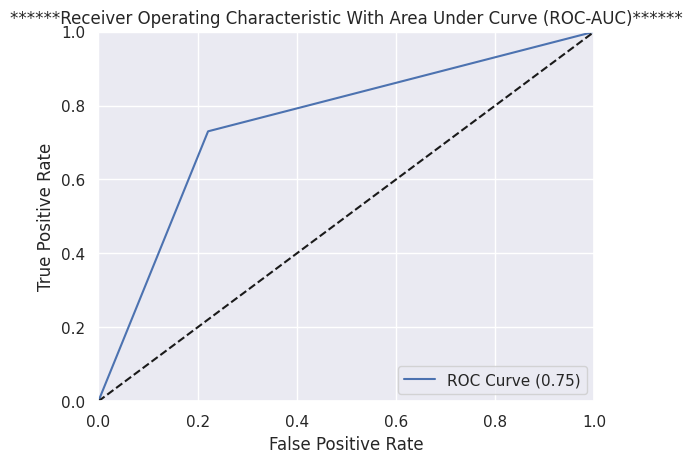

In [222]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ada = AdaBoostClassifier()
ada.fit(x_train, y_smote)
y_pred_train_ada = ada.predict(x_train)
y_pred_test_ada = ada.predict(x_test)
print("***************************")
print(confusion_matrix(y_smote, y_pred_train_ada))
print()
print(confusion_matrix(y_test, y_pred_test_ada))
print("***************************")
print(classification_report(y_smote, y_pred_train_ada))
print()
print(classification_report(y_test, y_pred_test_ada))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_smote, y_pred_train_ada))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_ada))

ada_roc_auc = roc_auc_score(y_test, y_pred_test_ada)
ada_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_ada)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % ada_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 2 - Gradient Boosting Algorithm

***************************
[[3356  759]
 [ 489 3626]]

[[845 204]
 [105 251]]
***************************
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4115
           1       0.83      0.88      0.85      4115

    accuracy                           0.85      8230
   macro avg       0.85      0.85      0.85      8230
weighted avg       0.85      0.85      0.85      8230


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1049
           1       0.55      0.71      0.62       356

    accuracy                           0.78      1405
   macro avg       0.72      0.76      0.73      1405
weighted avg       0.80      0.78      0.79      1405

***************************
Accuracy Train Score- 0.848359659781288

Accuracy Test Score- 0.7800711743772242


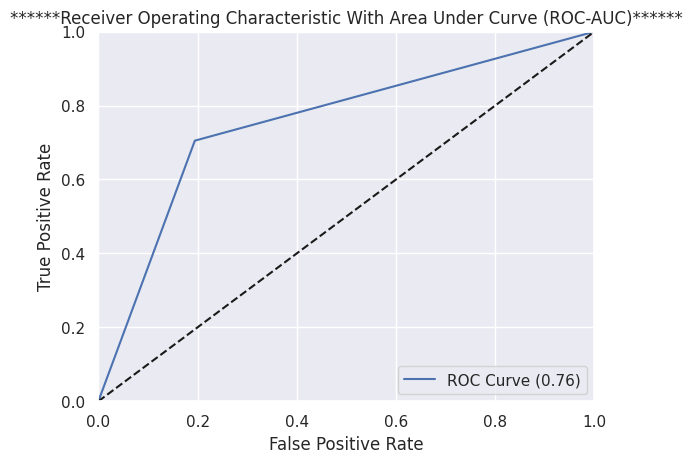

In [223]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
gdm = GradientBoostingClassifier()
gdm.fit(x_train, y_smote)
y_pred_train_gdm = gdm.predict(x_train)
y_pred_test_gdm = gdm.predict(x_test)
print("***************************")
print(confusion_matrix(y_smote, y_pred_train_gdm))
print()
print(confusion_matrix(y_test, y_pred_test_gdm))
print("***************************")
print(classification_report(y_smote, y_pred_train_gdm))
print()
print(classification_report(y_test, y_pred_test_gdm))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_smote, y_pred_train_gdm))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_gdm))

gdm_roc_auc = roc_auc_score(y_test, y_pred_test_gdm)
gdm_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_gdm)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % gdm_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 3 - XGBoost Classification

***************************
[[3862  253]
 [ 148 3967]]

[[887 162]
 [156 200]]
***************************
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4115
           1       0.94      0.96      0.95      4115

    accuracy                           0.95      8230
   macro avg       0.95      0.95      0.95      8230
weighted avg       0.95      0.95      0.95      8230


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1049
           1       0.55      0.56      0.56       356

    accuracy                           0.77      1405
   macro avg       0.70      0.70      0.70      1405
weighted avg       0.77      0.77      0.77      1405

***************************
Accuracy Train Score- 0.9512758201701094

Accuracy Test Score- 0.7736654804270463


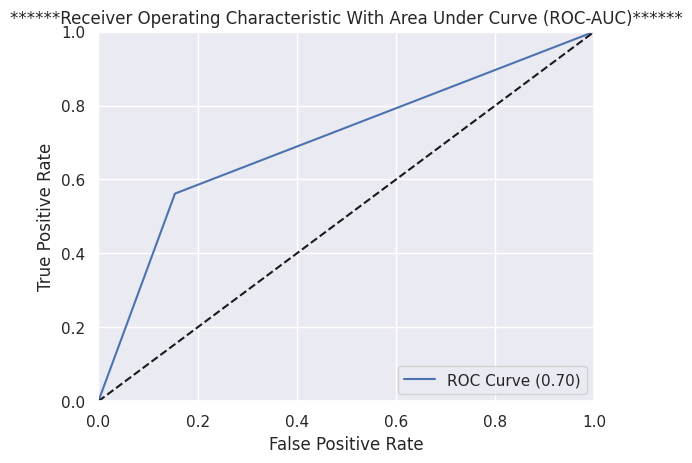

In [224]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_smote)
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)
print("***************************")
print(confusion_matrix(y_smote, y_pred_train_xgb))
print()
print(confusion_matrix(y_test, y_pred_test_xgb))
print("***************************")
print(classification_report(y_smote, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_smote, y_pred_train_xgb))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_xgb))

xgb_roc_auc = roc_auc_score(y_test, y_pred_test_xgb)
xgb_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_xgb)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % xgb_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 4 - Bagging Classifier

***************************
[[4091   24]
 [  60 4055]]

[[892 157]
 [167 189]]
***************************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4115
           1       0.99      0.99      0.99      4115

    accuracy                           0.99      8230
   macro avg       0.99      0.99      0.99      8230
weighted avg       0.99      0.99      0.99      8230


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1049
           1       0.55      0.53      0.54       356

    accuracy                           0.77      1405
   macro avg       0.69      0.69      0.69      1405
weighted avg       0.77      0.77      0.77      1405

***************************
Accuracy Train Score- 0.9897934386391252

Accuracy Test Score- 0.7693950177935943


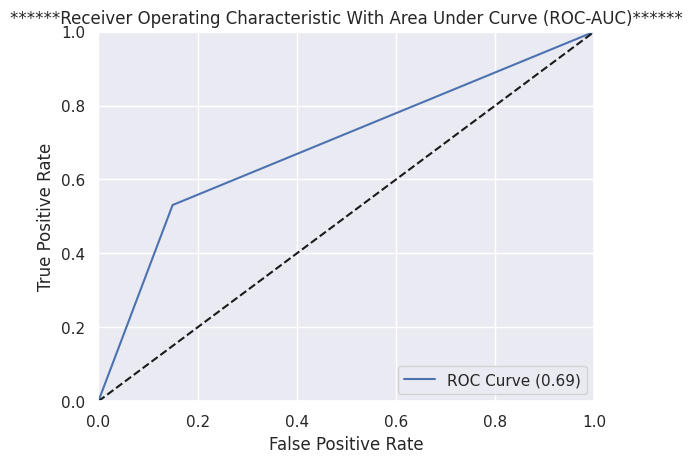

In [225]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train, y_smote)
y_pred_train_bagging = bagging.predict(x_train)
y_pred_test_bagging = bagging.predict(x_test)
print("***************************")
print(confusion_matrix(y_smote, y_pred_train_bagging))
print()
print(confusion_matrix(y_test, y_pred_test_bagging))
print("***************************")
print(classification_report(y_smote, y_pred_train_bagging))
print()
print(classification_report(y_test, y_pred_test_bagging))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_smote, y_pred_train_bagging))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_bagging))

bagging_roc_auc = roc_auc_score(y_test, y_pred_test_bagging)
bagging_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_bagging)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % bagging_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 5 - RandomForest Classification

***************************
[[4105   10]
 [   0 4115]]

[[875 174]
 [144 212]]
***************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4115
           1       1.00      1.00      1.00      4115

    accuracy                           1.00      8230
   macro avg       1.00      1.00      1.00      8230
weighted avg       1.00      1.00      1.00      8230


              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1049
           1       0.55      0.60      0.57       356

    accuracy                           0.77      1405
   macro avg       0.70      0.71      0.71      1405
weighted avg       0.78      0.77      0.78      1405

***************************
Accuracy Train Score- 0.9987849331713244

Accuracy Test Score- 0.7736654804270463


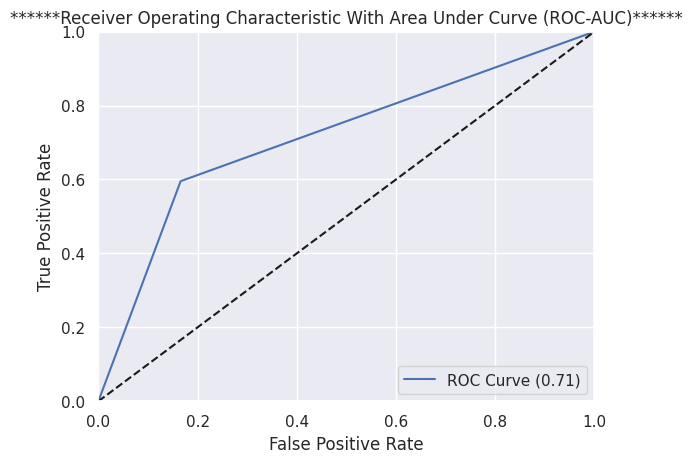

In [226]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(x_train, y_smote)
y_pred_train_rfm = rfm.predict(x_train)
y_pred_test_rfm = rfm.predict(x_test)
print("***************************")
print(confusion_matrix(y_smote, y_pred_train_rfm))
print()
print(confusion_matrix(y_test, y_pred_test_rfm))
print("***************************")
print(classification_report(y_smote, y_pred_train_rfm))
print()
print(classification_report(y_test, y_pred_test_rfm))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_smote, y_pred_train_rfm))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_rfm))

rfm_roc_auc = roc_auc_score(y_test, y_pred_test_rfm)
rfm_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_rfm)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % rfm_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 6 - LogisticRegression

***************************
[[3366  749]
 [ 661 3454]]

[[858 191]
 [119 237]]
***************************
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4115
           1       0.82      0.84      0.83      4115

    accuracy                           0.83      8230
   macro avg       0.83      0.83      0.83      8230
weighted avg       0.83      0.83      0.83      8230


              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1049
           1       0.55      0.67      0.60       356

    accuracy                           0.78      1405
   macro avg       0.72      0.74      0.73      1405
weighted avg       0.80      0.78      0.79      1405

***************************
Accuracy Train Score- 0.8286755771567437

Accuracy Test Score- 0.7793594306049823


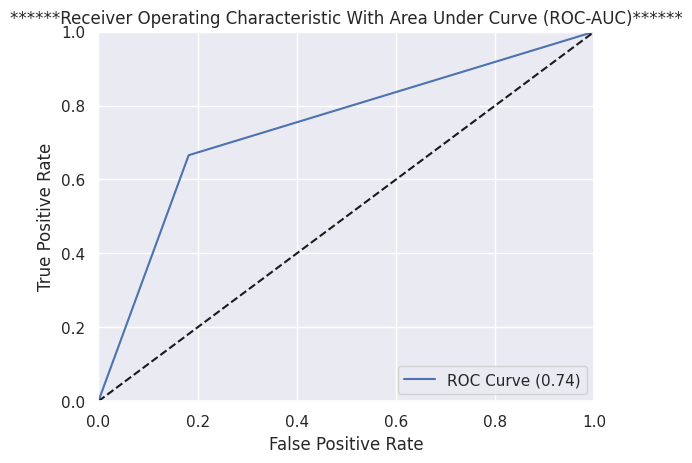

In [227]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()
lrm.fit(x_train, y_smote)
y_pred_train_lrm = lrm.predict(x_train)
y_pred_test_lrm = lrm.predict(x_test)
print("***************************")
print(confusion_matrix(y_smote, y_pred_train_lrm))
print()
print(confusion_matrix(y_test, y_pred_test_lrm))
print("***************************")
print(classification_report(y_smote, y_pred_train_lrm))
print()
print(classification_report(y_test, y_pred_test_lrm))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_smote, y_pred_train_lrm))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_lrm))

lrm_roc_auc = roc_auc_score(y_test, y_pred_test_lrm)
lrm_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_lrm)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % lrm_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## 7- MLP model

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6492 - loss: 0.6890 - val_accuracy: 0.7459 - val_loss: 0.5253
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7699 - loss: 0.4849 - val_accuracy: 0.7601 - val_loss: 0.4855
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8004 - loss: 0.4342 - val_accuracy: 0.7594 - val_loss: 0.4790
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8038 - loss: 0.4193 - val_accuracy: 0.7594 - val_loss: 0.4769
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8120 - loss: 0.4080 - val_accuracy: 0.7644 - val_loss: 0.4794
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8178 - loss: 0.3914 - val_accuracy: 0.7630 - val_loss: 0.4789
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8164 - loss: 0.3992 - val_accuracy: 0.7673 - val_loss: 0.4774
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8178 - loss: 0.3917 - val_accuracy: 0.7687 - val_loss:

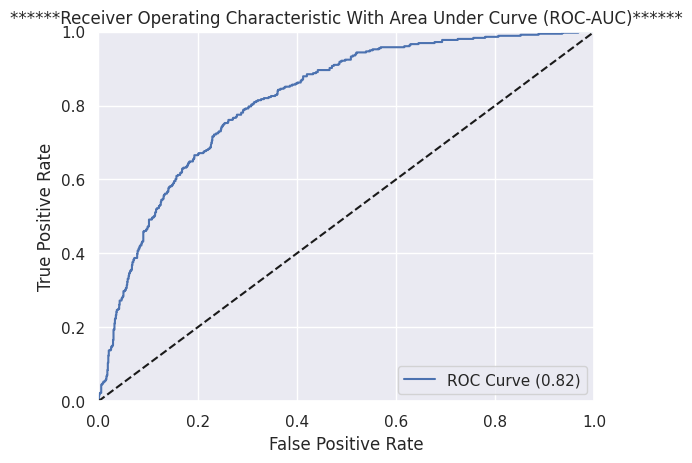

In [228]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# Define the model
model = Sequential()

# Fully Connected Layer
# 1st Hidden Layer
model.add(Dense(64, input_dim = 23, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


# 2nd Hidden Layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

x_train, y_smote
# Fit the model
model.fit(x_train, y_smote, epochs=10, batch_size= 128, validation_data=(x_test, y_test))


y_pred_test = model.predict(x_test)

print("***************************")

print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test.round()))

lrm_roc_auc = roc_auc_score(y_test, y_pred_test)
lrm_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % lrm_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

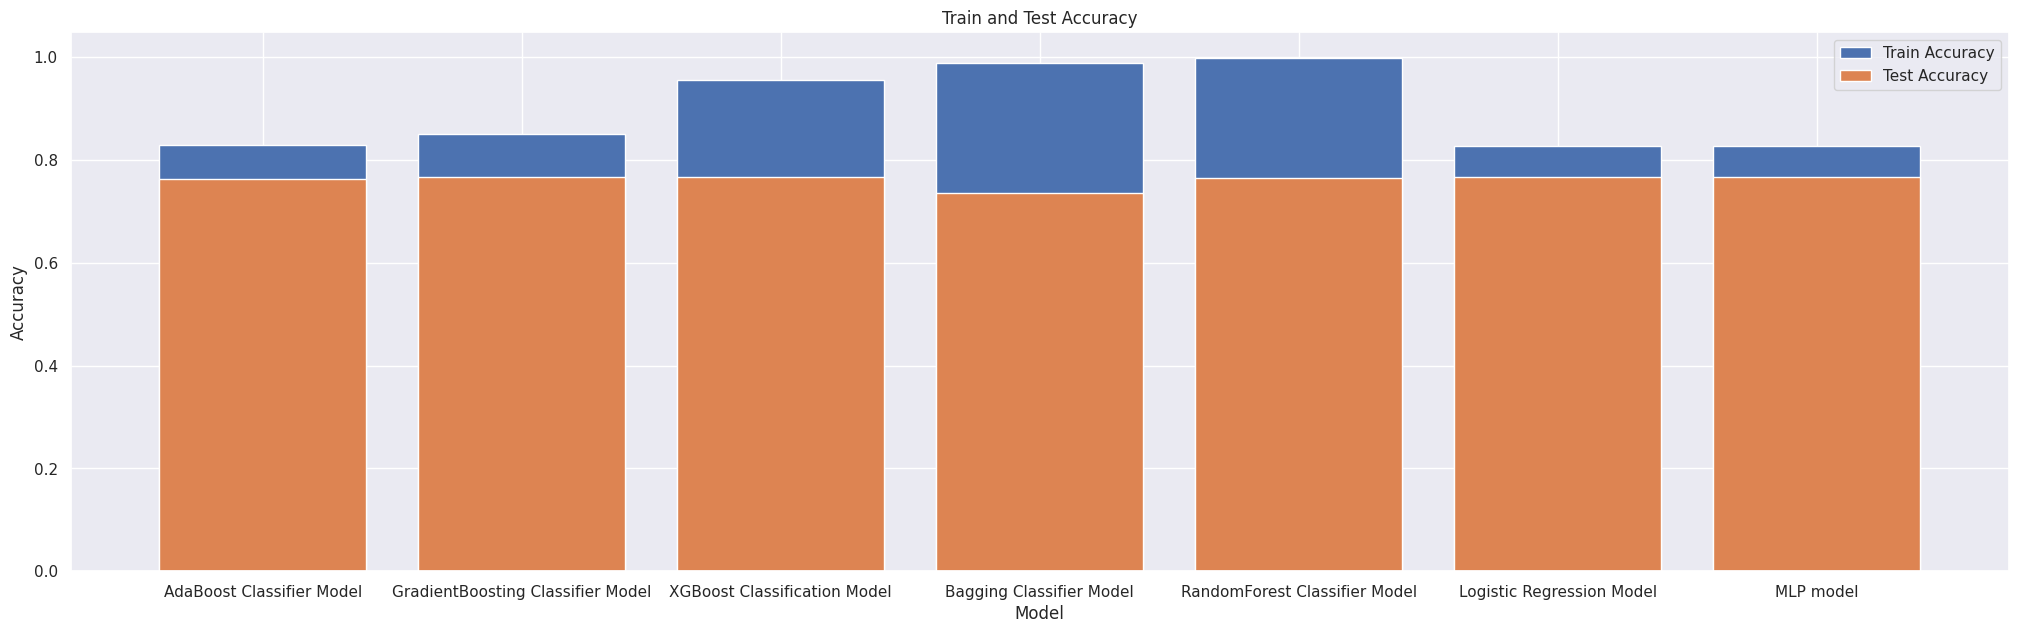

In [175]:
model_names = ['AdaBoost Classifier Model','GradientBoosting Classifier Model','XGBoost Classification Model', 'Bagging Classifier Model', 'RandomForest Classifier Model', 'Logistic Regression Model','MLP model']
train_accuracy = [0.8291947926711668, 0.8498071359691417, 0.9557618129218901, 0.9881870781099324,  0.9986740597878495,0.8278688524590164,0.8280]
test_accuracy = [0.7629524485450674, 0.7679205110007097, 0.7665010645848119, 0.7366926898509581, 0.7643718949609652, 0.7665010645848119,0.7679205110007097]


# Create a bar chart
plt.figure(figsize=(25, 7))
plt.bar(model_names, train_accuracy, label='Train Accuracy')
plt.bar(model_names, test_accuracy, label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()

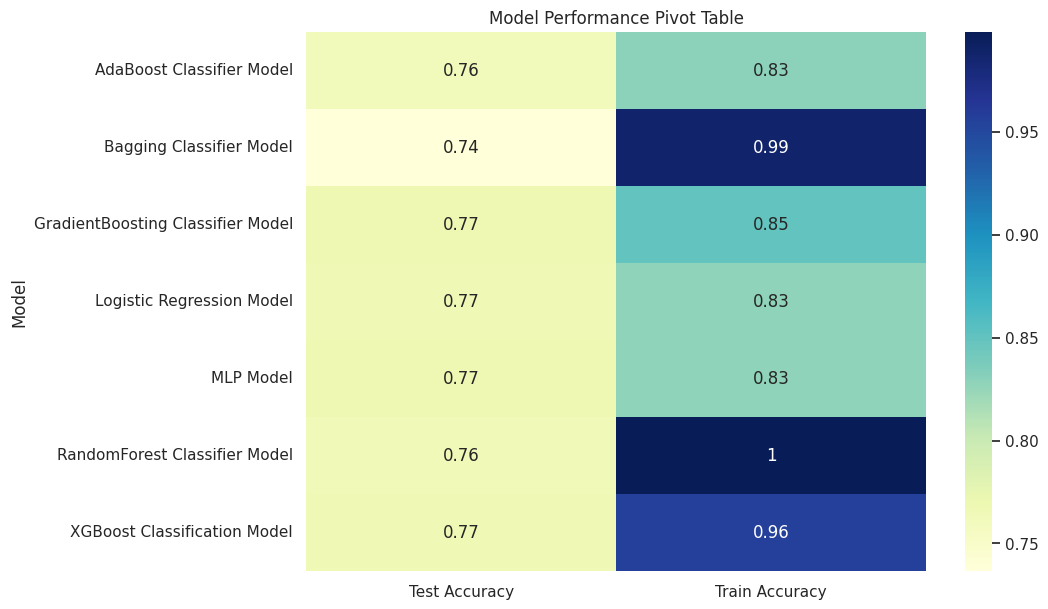

In [176]:
model_names = ['AdaBoost Classifier Model','GradientBoosting Classifier Model','XGBoost Classification Model', 'Bagging Classifier Model', 'RandomForest Classifier Model', 'Logistic Regression Model','MLP Model']
train_accuracy = [0.8291947926711668, 0.8498071359691417, 0.9557618129218901, 0.9881870781099324,  0.9986740597878495,0.8278688524590164,0.8280]
test_accuracy = [0.7629524485450674, 0.7679205110007097, 0.7665010645848119, 0.7366926898509581, 0.7643718949609652, 0.7665010645848119,0.7679205110007097]

df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

pivot_table = pd.pivot_table(df, values=['Train Accuracy', 'Test Accuracy'], index='Model', aggfunc=np.mean)

# create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Model Performance Pivot Table")
plt.show()

Based on the model performance pivot table,

*GradientBoosting Classifier Model*

Reason:

- Balanced performance: Test accuracy (0.77) and Train accuracy (0.85) are relatively close, indicating less overfitting.
- High test accuracy: 0.77 is among the highest test accuracies in the table.

Other models have issues:

- AdaBoost Classifier: Lower test accuracy (0.76) compared to GradientBoosting.
- Bagging Classifier: Severe overfitting (Test accuracy: 0.74, Train accuracy: 0.99).
- Logistic Regression and MLP: Similar performance to GradientBoosting, but slightly lower test accuracy.
- RandomForest Classifier: Perfect train accuracy (1) indicates overfitting.
- XGBoost Classification: High train accuracy (0.96), but relatively lower test accuracy (0.77).

GradientBoosting Classifier Model offers a good balance between test and train accuracy, making it a reliable choice.

**Perform hyperparameter tuning and cross-validation to ensure that the model is not overfitting or underfitting.**

In [98]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

model = GradientBoostingClassifier()
param_grid = {'max_depth': [5, 7],
              'n_estimators': [100,200,300],
              'learning_rate': [0.01,0.1, 0.5]

             }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation

grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(x_train, y_smote)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Refit the model with the best hyperparameters and evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Hyperparameters: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 300}
Best Accuracy: 0.8458287399144497
Test Accuracy: 0.7579843860894251


In [47]:
import pickle
with open('gb_model.pkl1', 'wb') as f:
  pickle.dump(gdm,f)


In [48]:
#!pip install flask

In [49]:
#!pip install flask-ngrok

In [93]:
#!pip install --upgrade flask-ngrok

In [235]:
# Install ngrok if it's not installed yet
#!pip install pyngrok

# Import the necessary libraries
from pyngrok import ngrok
import os
import requests


ngrok.set_auth_token('2oeLkAG9uhPKYT8nRgLAhTBsJF0_5Ho4UEpaaLW7iu4pTvu6f')
# Start ngrok tunnel for the Flask app
public_url = ngrok.connect(5000) # 5000 is the port Flask runs on
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:5000\"")

# Now, run your Flask app after starting ngrok manually
import pickle
import pandas as pd
from flask import Flask, request, jsonify

app = Flask(__name__)

# Sample model loading
with open('gb_model.pkl1', 'rb') as f:
  model=pickle.load(f)

data={'SeniorCitizen':1,'MonthlyCharges':23,'TotalCharges':230,'gender_Male':1,'Partner_Yes':0,'Dependents_Yes':1
      ,'PhoneService_Yes':1,'MultipleLines_Yes':0,'InternetService_Fiber optic':1,'InternetService_No':0,'OnlineSecurity_Yes':1
      ,'OnlineBackup_Yes':1,'DeviceProtection_Yes':1,'TechSupport_Yes':1,'StreamingTV_Yes':0,'StreamingMovies_Yes':0,
      'Contract_One year':1,
      'Contract_Two year':0,'PaperlessBilling_Yes':1,'PaymentMethod_Credit card (automatic)':0,'PaymentMethod_Electronic check':1,
      'PaymentMethod_Mailed check':0,'tenure_range':0}

#requests.post(data)


#ngrok_url = "https://8a3f-34-168-129-178.ngrok-free.app/predict"  # Your ngrok public URL

# Send a POST request to the /predict endpoint with the data
#response = requests.post(ngrok_url, json=data)


@app.route("/",methods=['GET'])
def root():
  return "HELLO WORLD!!"



@app.route("/predict",methods=['POST'])
def predict():
  #print("inside predict",request.method)
    data=request.get_json()
    df=pd.DataFrame(data,index=[0])
    df = df.astype(object).apply(pd.to_numeric, errors='ignore')
    prediction=model.predict(df)
    prediction_result = int(prediction[0])
    return jsonify({'prediction':prediction_result})

# Start the Flask app on port 5000


 * ngrok tunnel "NgrokTunnel: "https://0133-35-236-177-160.ngrok-free.app" -> "http://localhost:5000"" -> "http://127.0.0.1:5000"


In [ ]:

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [10/Nov/2024 10:33:02] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Nov/2024 10:33:06] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [10/Nov/2024 10:40:22] "POST /predict HTTP/1.1" 200 -


Request-

{
    "SeniorCitizen": 0,
    "MonthlyCharges": 53.85,
    "TotalCharges": 108.15,
    "gender_Male": 1,
    "Partner_Yes": 0,
    "Dependents_Yes": 0,
    "PhoneService_Yes": 1,
    "MultipleLines_Yes": 0,
    "InternetService_Fiber optic": 0,
    "InternetService_No": 0,
    "OnlineSecurity_Yes": 1,
    "OnlineBackup_Yes": 1,
    "DeviceProtection_Yes": 0,
    "TechSupport_Yes": 0,
    "StreamingTV_Yes": 0,
    "StreamingMovies_Yes": 0,
    "Contract_One year": 0,
    "Contract_Two year": 0,
    "PaperlessBilling_Yes": 1,
    "PaymentMethod_Credit card (automatic)": 0,
    "PaymentMethod_Electronic check": 0,
    "PaymentMethod_Mailed check": 1,
    "tenure_range": 0
}


response-

{
    "prediction": 1
}

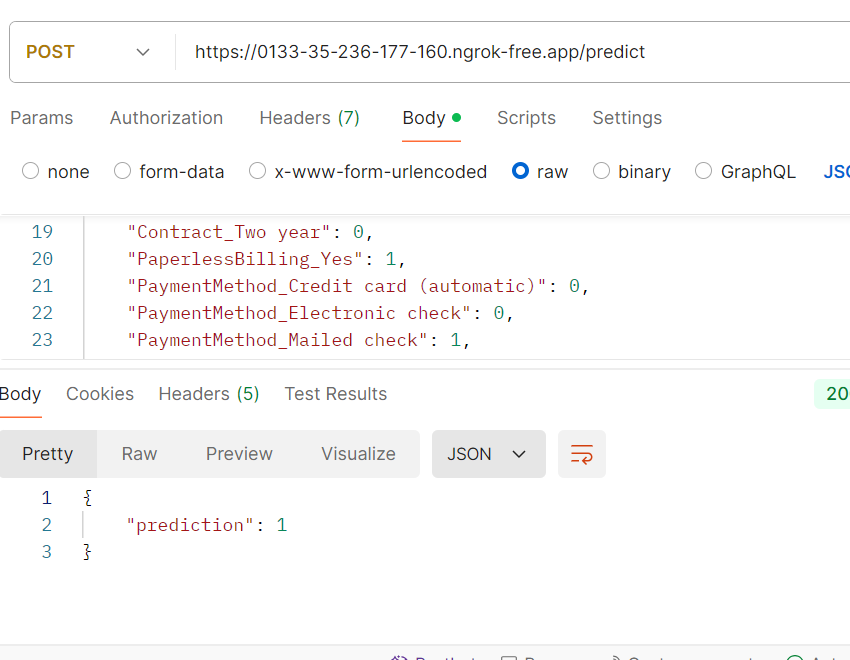

In [67]:
'''from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))'''

https://nv4pvrh7jyf-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [232]:
'''ngrok_url = "https://482f-35-236-177-160.ngrok-free.app/predict"  # Your ngrok public URL

# Send a POST request to the /predict endpoint with the data


data={
    "SeniorCitizen": 1,
    "MonthlyCharges": 23,
    "TotalCharges": 230,
    "gender_Male": 1,
    "Partner_Yes": 0,
    "Dependents_Yes": 1,
    "PhoneService_Yes": 1,
    "MultipleLines_Yes": 0,
    "InternetService_Fiber optic": 1,
    "InternetService_No": 0,
    "OnlineSecurity_Yes": 1,
    "OnlineBackup_Yes": 1,
    "DeviceProtection_Yes": 1,
    "TechSupport_Yes": 1,
    "StreamingTV_Yes": 0,
    "StreamingMovies_Yes": 0,
    "Contract_One year": 1,
    "Contract_Two year": 0,
    "PaperlessBilling_Yes": 1,
    "PaymentMethod_Credit card (automatic)": 0,
    "PaymentMethod_Electronic check": 1,
    "PaymentMethod_Mailed check": 0,
    "tenure_range": 0
}

response = requests.post(ngrok_url, json=data)'''

THE END